In [68]:
import torch
import pickle

## 1. Introduction

In [69]:
gcn_embed_weights = torch.load('./embed/exhird_h_normal_gcn_word_embed_cpu.pt')
normal_embed_weights = torch.load('./embed/exhird_h_normal_word_embed_cpu.pt')

In [70]:
gcn_embed_weights, normal_embed_weights

(tensor([[ 0.2836, -0.1732, -0.1950,  ...,  0.0114,  0.0009, -0.1053],
         [-0.0228,  0.0327,  0.0508,  ..., -0.0469, -0.0259, -0.0513],
         [ 0.0008,  0.0006,  0.0141,  ..., -0.0036,  0.0088,  0.0016],
         ...,
         [-0.0045, -0.2020,  0.2216,  ...,  0.0792,  0.1217, -0.1207],
         [ 0.0345, -0.1073,  0.0399,  ...,  0.0838,  0.0720, -0.0278],
         [-0.0870, -0.0671, -0.0815,  ..., -0.0585, -0.0420, -0.0377]]),
 tensor([[ 2.6870e-01,  1.1954e-01, -1.4705e-01,  ...,  1.0425e-01,
          -1.3967e-01,  8.2668e-02],
         [-1.8914e-03, -8.9053e-02,  2.7039e-04,  ..., -7.5917e-02,
           9.3523e-02, -2.6091e-02],
         [-4.2204e-03, -5.3326e-03, -3.1465e-05,  ..., -2.5024e-03,
          -3.1119e-04,  1.0321e-02],
         ...,
         [ 6.4759e-02,  2.0975e-01, -7.1785e-02,  ...,  3.7704e-04,
          -8.7868e-02, -1.0038e-01],
         [-7.4189e-02,  1.0728e-01, -9.2442e-03,  ...,  3.7786e-02,
          -2.5932e-02,  1.3278e-01],
         [ 1.6472e-

In [71]:
assert gcn_embed_weights.shape == normal_embed_weights.shape

In [72]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

In [73]:
gcn_embed_weights = gcn_embed_weights[:100, :].numpy()
normal_embed_weights = normal_embed_weights[:100, :].numpy()

In [74]:
with open('./vocab2idx.pkl', 'rb') as f:
    vocab2idx = pickle.load(f)
    f.close()

In [75]:
vocab = list(vocab2idx)

In [76]:
t_sne = TSNE(perplexity=40, n_components=2, verbose=2)
%time tsne_gcn_embed = t_sne.fit_transform(gcn_embed_weights)

[t-SNE] Computing 99 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 0.946089
[t-SNE] Computed conditional probabilities in 0.006s
[t-SNE] Iteration 50: error = 53.5478821, gradient norm = 0.5543979 (50 iterations in 0.048s)
[t-SNE] Iteration 100: error = 54.7543716, gradient norm = 0.5384857 (50 iterations in 0.029s)
[t-SNE] Iteration 150: error = 56.8438416, gradient norm = 0.4553539 (50 iterations in 0.018s)
[t-SNE] Iteration 200: error = 54.9983826, gradient norm = 0.4728962 (50 iterations in 0.018s)
[t-SNE] Iteration 250: error = 53.2124176, gradient norm = 0.5395002 (50 iterations in 0.020s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.212418
[t-SNE] Iteration 300: error = 0.6794283, gradient norm = 0.0099372 (50 iterations in 0.018s)
[t-SNE] Iteration 350: error = 0.4570609, gradient norm = 0.0045589 (

In [77]:
import pandas as pd

gcn_embed_df = pd.DataFrame(tsne_gcn_embed, index=vocab[:100], columns=['x', 'y'])

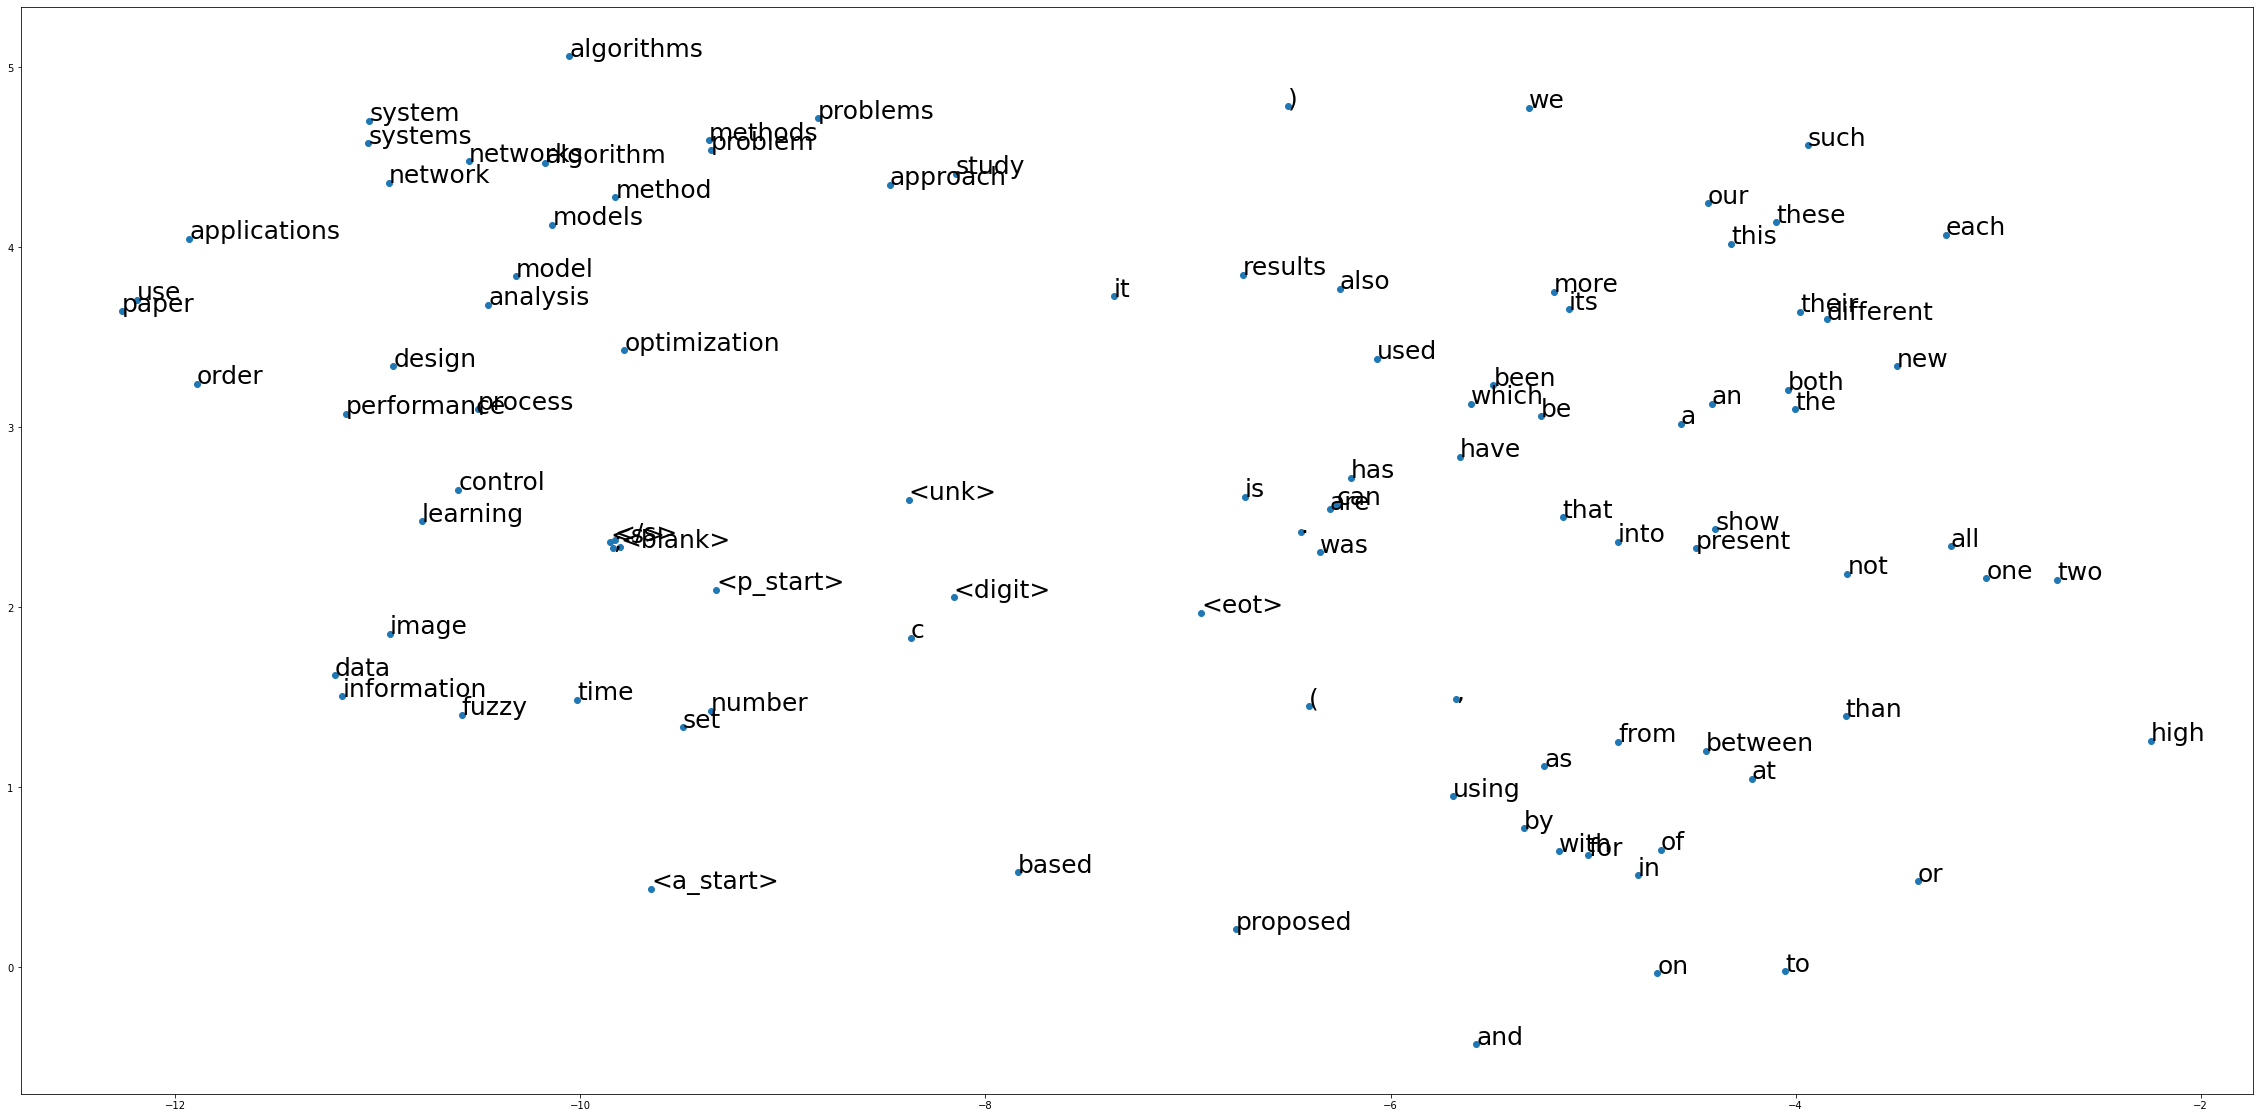

In [81]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(gcn_embed_df['x'], gcn_embed_df['y'])

for word, pos in gcn_embed_df.iterrows():
    ax.annotate(word, pos, fontsize=25)
plt.show()

In [82]:
t_sne = TSNE(n_components=2, verbose=2)
%time tsne_normal_embed = t_sne.fit_transform(normal_embed_weights)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 100 samples in 0.000s...
[t-SNE] Computed neighbors for 100 samples in 0.004s...
[t-SNE] Computed conditional probabilities for sample 100 / 100
[t-SNE] Mean sigma: 0.729428
[t-SNE] Computed conditional probabilities in 0.007s
[t-SNE] Iteration 50: error = 64.2882385, gradient norm = 0.4617513 (50 iterations in 0.041s)
[t-SNE] Iteration 100: error = 60.4876709, gradient norm = 0.4773119 (50 iterations in 0.025s)
[t-SNE] Iteration 150: error = 67.6318207, gradient norm = 0.4548575 (50 iterations in 0.020s)
[t-SNE] Iteration 200: error = 65.4028473, gradient norm = 0.5054086 (50 iterations in 0.021s)
[t-SNE] Iteration 250: error = 63.5507126, gradient norm = 0.4974190 (50 iterations in 0.021s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.550713
[t-SNE] Iteration 300: error = 1.0650839, gradient norm = 0.0101530 (50 iterations in 0.019s)
[t-SNE] Iteration 350: error = 0.7632957, gradient norm = 0.0022875 (

In [83]:
normal_embed_df = pd.DataFrame(tsne_normal_embed, index=vocab[:100], columns=['x', 'y'])

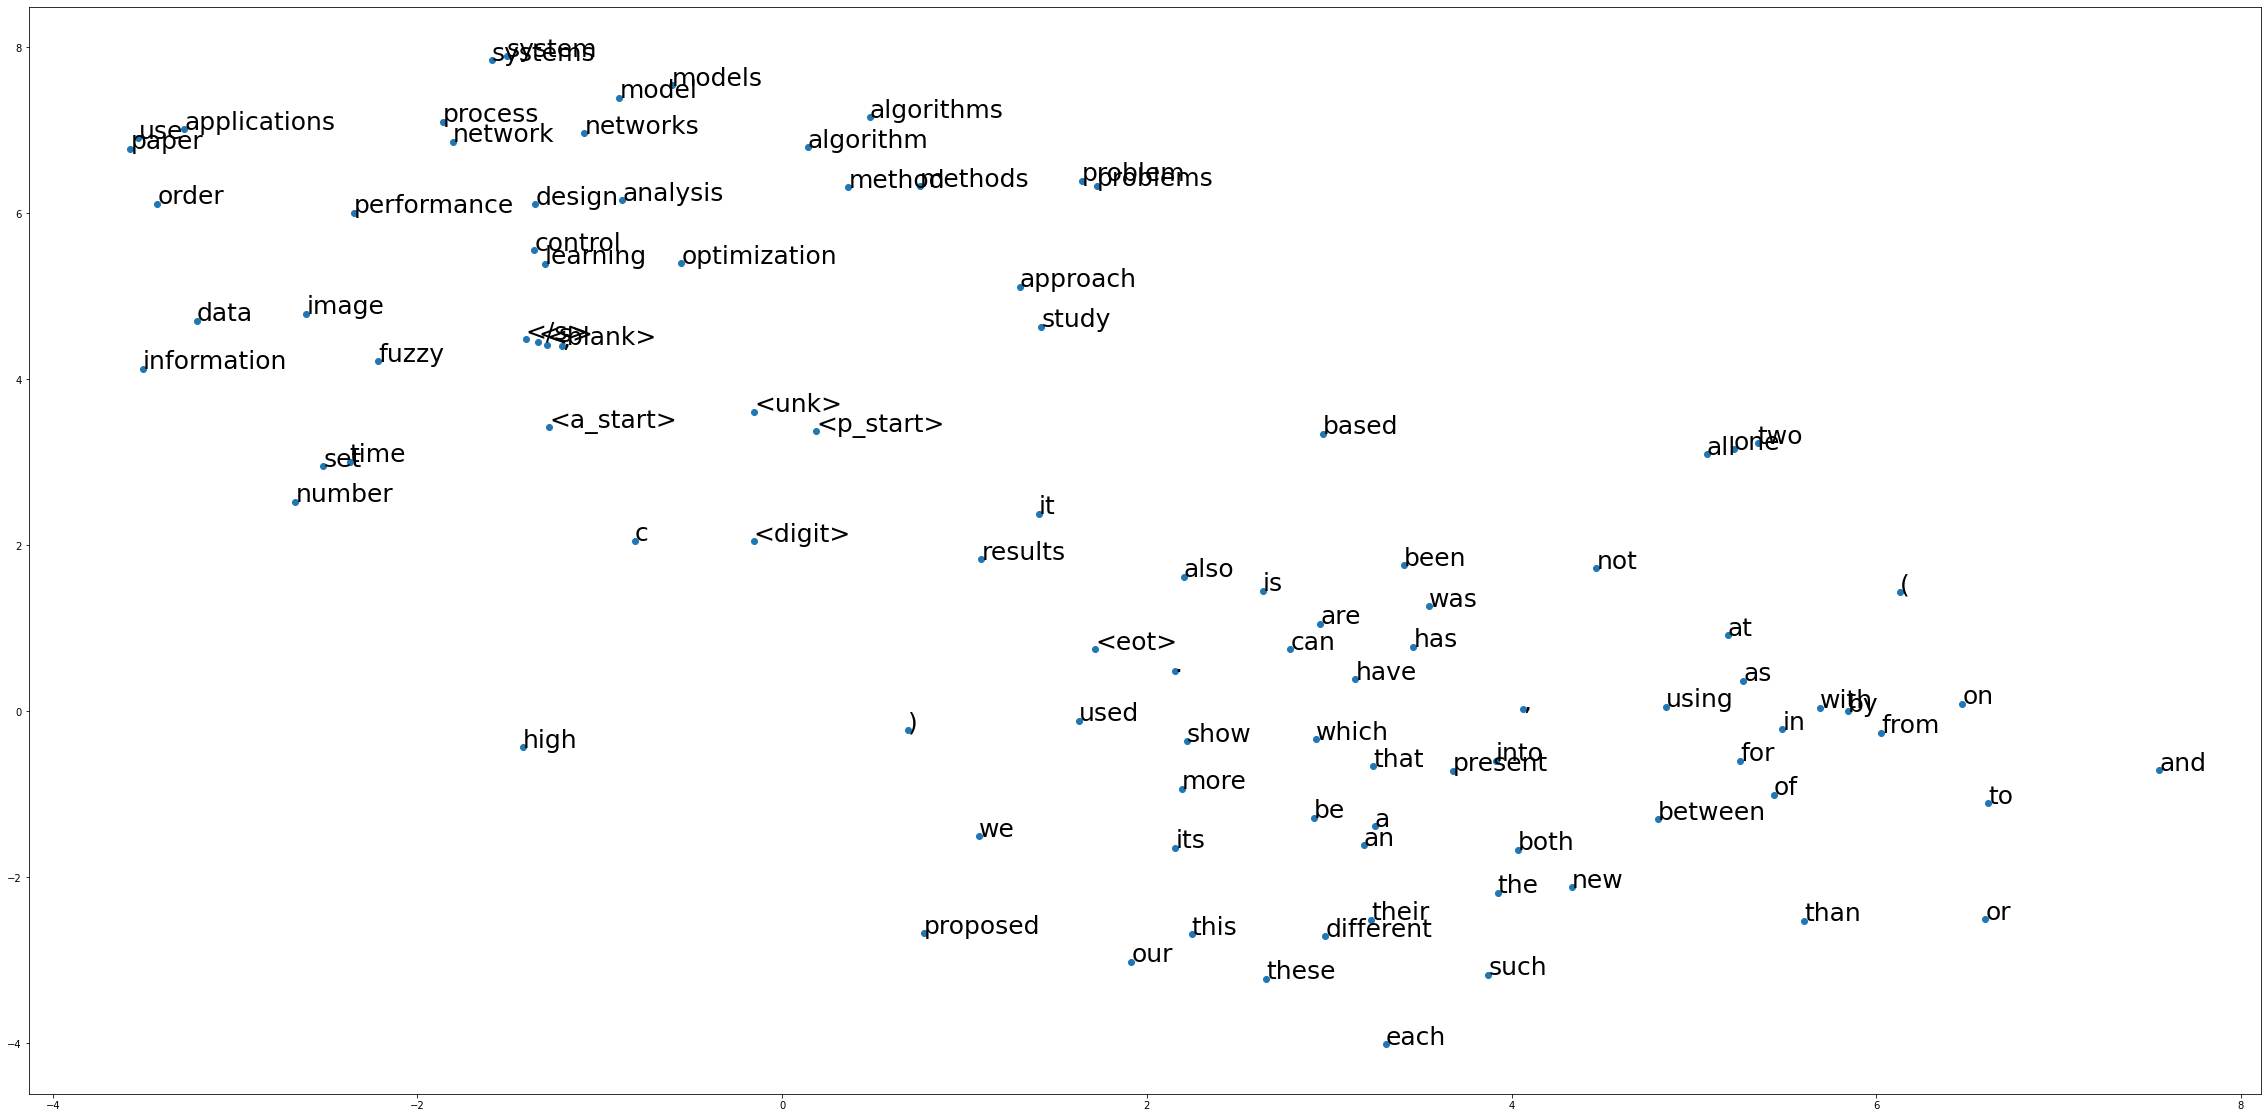

In [84]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(normal_embed_df['x'], normal_embed_df['y'])

for word, pos in normal_embed_df.iterrows():
    ax.annotate(word, pos, fontsize=25)
plt.show()